# Get Set Up

In [1]:
# Get Data
!git clone https://github.com/ChristianNally/LHL-datasci-lectures-nally.git;
!mkdir data
!mv /content/LHL-datasci-lectures-nally/w05d2/data/* /content/data;
!rm -r sample_data/ LHL-datasci-lectures-nally/;

# Set up environment
!pip install git+https://github.com/mgelbart/plot-classifier.git

Cloning into 'LHL-datasci-lectures-nally'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 93 (delta 12), reused 90 (delta 9), pack-reused 0
Unpacking objects: 100% (93/93), done.
  Cloning https://github.com/mgelbart/plot-classifier.git to /tmp/pip-req-build-j0gaum8f
  Running command git clone -q https://github.com/mgelbart/plot-classifier.git /tmp/pip-req-build-j0gaum8f
  Created wheel for plot-classifier: filename=plot_classifier-0.1-py3-none-any.whl size=3413 sha256=c0cefcc412bbf05a2db0b6c452fb6a60c76b3fa6c834139d72f5babe1018d1be
  Stored in directory: /tmp/pip-ephem-wheel-cache-ija5hnuc/wheels/e3/ea/d3/77cbda59c0b87b9e9b7877748de6746bd4ee2465a7e78e7a85
Successfully built plot-classifier


<img src="https://drive.google.com/uc?id=19Ym9OcTH4rup5yy7Zf0DvsGqTqMu78LZ"/>

Lecture Material: https://drive.google.com/drive/folders/1zRk7wkGI6jPCRFgls_sEdFnRWKTOIHh1?usp=sharing

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt
%matplotlib inline

**Agenda:**

* "Express" Review of Linear Regression

* Limitations of Linear Regression

* Logistic regression
    
* Mention of GLM (generalised linear models)

## 1. Fast Review of Linear Regression

Let's imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target Variable.

In [3]:
df = pd.read_csv('data/weight-height.csv', usecols = ['Height', 'Weight'])
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [6]:
# Initializing a LR model
rm = Ridge() # ||y - Xw||^2 + lambda * ||w||^2 -> LSE with L2 regularization

# y  = m*x + b
X_train = df['Height'].values.reshape(-1, 1)
y_train = df['Weight']

In [7]:
rm.fit(X_train, y_train);

In [8]:
rm.predict(X_train)[:5]

array([219.16108997, 180.07242032, 221.19140492, 202.83112165,
       188.56054448])

In [9]:
rm.score(X_train, y_train)   # R^2 value - coefficient of determination

0.8551742120219649

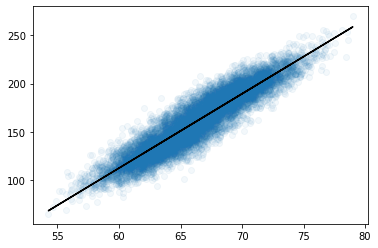

In [10]:
plt.scatter(X_train, y_train, alpha=0.05)

# y  = m*x + b

plt.plot(X_train, (rm.coef_*X_train) + rm.intercept_, c='black')

## So? How were we able to plot?

In [11]:
ridge_coeffs = rm.coef_
ridge_coeffs

array([7.7172355])

In [12]:
words_coeffs_df = pd.DataFrame(data = ridge_coeffs.T, index = ['Height'], columns=['Coefficients'])
words_coeffs_df

,Coefficients
Height,7.717236


In [13]:
ridge_intercept = rm.intercept_
ridge_intercept

-350.73373164219254

## Predicting

In [14]:
# True Value
y_train[0:1]

0    241.893563
Name: Weight, dtype: float64

In [15]:
rm.predict(X_train[0:1])

array([219.16108997])

## Prediction By Hand

In [16]:
(ridge_coeffs * X_train[0:1]).sum(axis=1) + rm.intercept_

array([219.16108997])

### 2. Limitations for Linear Regression

In Regression, we allow the response to take on any real number. But what if the range is restricted?

1. Positive values: river flow. 
    - Lower limit: 0
2. Percent/proportion data: proportion of income spent on housing in Vancouver. 
    - Lower limit: 0
    - Upper limit: 1. 
3. Binary data: success/failure data.
    - Only take values of 0 and 1.
4. Count data: number of male crabs nearby a nesting female
    - Only take count values (0, 1, 2, ...)

Notice the problem here!! **the regression lines extend beyond the possible range of the response**.   

This is *mathematically incorrect*, the expected value cannot extend outside of the range of Y. 

The *practical* consequences:
- When fitting a linear regression model when the range of the response is restricted, we lose hope for extrapolation, as we obtain logical fallacies if we do. 

- However, a linear regression model might still be useful in this restricted range. After all, the linear trend looks good for the range of the data. 


## Classification and Regression Problems (Quick Review)

![img](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png)

More specifically, in Logistic regression:

<img src="https://drive.google.com/uc?id=1HEqwWi6NtGnQw___xwb-SNtJny0mGGnC" width="600" height="auto" />

### 3. Logistic Regression
<img src="https://drive.google.com/uc?id=1eB4UqfaFAjRy5-HSZyWQEfn-x_y8Mark"/>

<img src="https://drive.google.com/uc?id=1o_UZio45K5xk4RqJEaYUuYtN_MJAK3Wp"/>

<img src="https://drive.google.com/uc?id=1ltA7hpKP-tprzqevwQky_-yzL_-CZFvW"/>

Note that **logistic regression is not a regression, but a classification learning algorithm**. The name comes from statistics and is due to the fact that the mathematical formulation of logistic regression is similar to that of linear regression.

- A linear model for classification. 
- It learns weights associated with each feature and the bias. 
- The decision boundary is a hyperplane dividing the feature space in "half". That's why we call it a linear classifier.

<img src="https://drive.google.com/uc?id=1qKakccKbaDiN-pK9OLdRSM65R4-1toof" width=500 height=320 />

<img src="https://drive.google.com/uc?id=1mNg5r3qN-pihyEy4V6L6g_VQnEJ3dKul" width=500 height=300 />

<img src="https://drive.google.com/uc?id=1NdgzPG95O1hmgRSsp9n6ZfmxMrvxDY4I" width=500 height=300 />

* Source: https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer

### Explanation of Log Reg using USA and Canada Lat Long data


In [17]:
cities_df = pd.read_csv("data/canada_usa_cities.csv")
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]

cities_df.head()

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA


In [18]:
y_test

172    Canada
175    Canada
181    Canada
132    Canada
189    Canada
195    Canada
198    Canada
170    Canada
95     Canada
31        USA
42        USA
179    Canada
191    Canada
120    Canada
19        USA
72        USA
20        USA
52        USA
147    Canada
166    Canada
119    Canada
200    Canada
4         USA
108    Canada
157    Canada
21        USA
91     Canada
158    Canada
137    Canada
194    Canada
197    Canada
53        USA
180    Canada
162    Canada
184    Canada
161    Canada
10        USA
71        USA
80        USA
26        USA
11        USA
173    Canada
Name: country, dtype: object

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Decision boundary of logistic regression

The decision boundary is a hyperplane dividing the feature space in half.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


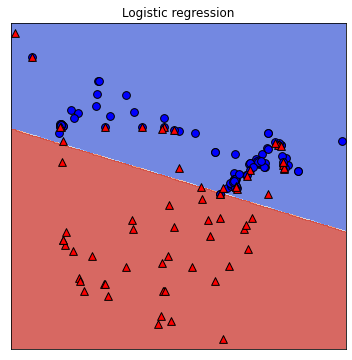

In [20]:
plt.figure(figsize=(6, 6))
plot_classifier(X_train, y_train, lr, ax=plt.gca())
plt.title("Logistic regression");

### Take Home Excercise #1

Remove the Alaska outliers and re train the model. 
1. How did the fit change ?  
1. Does this yeild a more appropriate model ?

### Accessing learned weights

- Recall that logistic regression learns the weights $w$ and bias or intercept $b$

\begin{equation}
\begin{split}
z =& w_1x_1 + \dots w_dx_d + b\\
=& w^Tx + b
\end{split}
\end{equation}

- How to access these weights? 
    - In `sklearn`, the `coef_` attribute of the `LogisticRegression` object gives the weights of the features.

In [21]:
X_train.columns

Index(['longitude', 'latitude'], dtype='object')

In [22]:
print("Model weights: %s"%(lr.coef_)) # these are weights
print("Model intercept: %s"%(lr.intercept_)) # this is the bias term
data = {'features': X_train.columns, 'coefficients':lr.coef_[0]}
pd.DataFrame(data)

Model weights: [[-0.04108149 -0.33683126]]
Model intercept: [10.8869838]


,features,coefficients
0,longitude,-0.041081
1,latitude,-0.336831


- Both negative weights 
- The weight of latitude is larger in magnitude. 

### Prediction with learned weights

In [23]:
example = X_test.iloc[0,:]
example.tolist()

[-64.8001, 46.098]

In [24]:
lr.intercept_

array([10.8869838])

Calculate raw model output -> $\hat{y}$ as: ```y_hat = np.dot(w, x) + b```

In [25]:
lr.coef_.flatten()

array([-0.04108149, -0.33683126])

In [26]:
np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)

array([-1.97817876])

In [27]:
lr.classes_

array(['Canada', 'USA'], dtype=object)

- Our threshold here is 0
- The sign is negative and so predict class -1 (Canada in our case). 

In [28]:
lr.predict([example])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Canada'], dtype=object)

### Scores to probabilities 

- The numbers we saw above are "raw model output".
- For linear regression this would have been the prediction.
- For logistic regression, you check the **sign** of this value.
  - If positive, predict $+1$; if negative, predict $-1$.
  - These are "hard predictions".
- You can also have "soft predictions", aka predicted probabilities. 
  - To convert the raw model output into probabilities, instead of taking the sign, we apply the sigmoid.

#### The sigmoid function 
- The sigmoid function "squashes" the raw model output from any number to the range $[0,1]$.
$$y' = \frac{1}{1+e^{-z}}$$ 
- $y'$ is the output of the logistic regression model for a particular example.
- Then we can interpret the output as probabilities.
- Recall our hard predictions that check the sign of $w^Tx$, or, in other words, whether or not it is $> 0$.
  - The threshold $w^Tx=0$ corresponds to $p=0.5$. 
  - In other words, if our predicted probability is above $0.5$ then our hard prediction is $+1$.
 


**Do not lose sleep over this but check it out** 
- Note that $z = x$ here is also referred to as the log-odds because the inverse of the sigmoid states that $x$ can be defined as the log of the probability of the "1" label (e.g., "USA") divided by the probability of the "0" label (e.g., "Canada").

$$z = x = \text{log}(\frac{y'}{1-y'})$$ 


Explanation (Don't worry if you can't follow this derivation):

$$y' = \frac{1}{1+e^{-z}}$$ 

$$1+e^{-z} = \frac{1}{y'}$$ 

$$e^{-z} = \frac{1}{y'} - 1$$ 

$$e^{-z} = \frac{1-y'}{y'} $$ 

$$-zlog(e) = log(\frac{1-y'}{y'}) $$

$$z = \text{log}(\frac{y'}{1-y'})$$

$$ y' = Probability for class 1$$  $$z = log odds $$

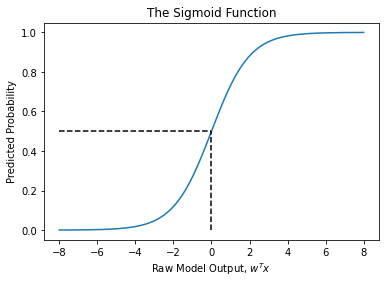

In [ ]:
sigmoid = lambda x: 1/(1+np.exp(-x))

raw_model_output = np.linspace(-8,8,1000)
plt.plot(raw_model_output, sigmoid(raw_model_output));
plt.plot([0,0],[0,0.5], '--k')
plt.plot([-8,0],[0.5,0.5], '--k')
plt.xlabel("Raw Model Output, $w^Tx$"); plt.ylabel("Predicted Probability");plt.title("The Sigmoid Function");

### Predicting probabilities 

- You can get the probabilities (confidence) of the classifier's prediction using the `model.predict_proba` method. 

In [ ]:
lr.predict_proba([example])
#soft prediction
# Take x = W*features + b -> sigmoid(x) -> y' -> Probability of the 1 class 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.87848688, 0.12151312]])

Let's examine whether we get the same answer if we call sigmoid on $w^Tx + b$

In [ ]:
log_reg_out = np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)
log_reg_out

array([-1.97817876])

In [ ]:
sigmoid(log_reg_out)

array([0.12151312])

Sanity Check: We got the same score!

In [ ]:
# Predicting probabilities
data_dict = {"y":y_train[:10], 
             "predicted y": lr.predict(X_train[:10]).tolist(),
             "probabilities": lr.predict_proba(X_train[:10]).tolist()}
pd.DataFrame(data_dict)

,y,predicted y,probabilities
160,Canada,Canada,"[0.7046068097086481, 0.2953931902913519]"
127,Canada,Canada,"[0.563016906204013, 0.436983093795987]"
169,Canada,Canada,"[0.8389680973255864, 0.16103190267441364]"
188,Canada,Canada,"[0.7964150775404333, 0.20358492245956678]"
187,Canada,Canada,"[0.9010806652340972, 0.0989193347659027]"
192,Canada,Canada,"[0.7753006388010791, 0.2246993611989209]"
62,USA,USA,"[0.03074070460652778, 0.9692592953934722]"
141,Canada,Canada,"[0.6880304799160921, 0.3119695200839079]"
183,Canada,Canada,"[0.7891358587234147, 0.21086414127658526]"
37,USA,USA,"[0.006546969753885357, 0.9934530302461146]"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


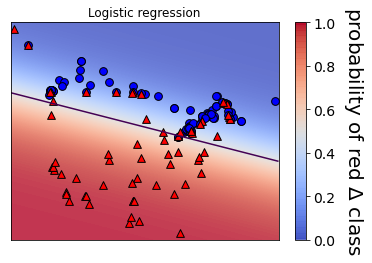

In [ ]:
plot_classifier(X_train, y_train, lr, proba=True, ax=plt.gca())
plt.title("Logistic regression");

**Model Evaluation**

We don't always evaluate a model based on accuracy.

A confusion matrix is a table that allows us evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

![img](https://www.geavis.si/assets1191/wp-content/uploads/2017/09/Geavis-difference-accuracy-precision.jpg)

In [ ]:
from sklearn import metrics

y_pred=lr.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[28,  0],
       [ 7,  7]])

In [ ]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()

**Accuracy:** Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.

In [ ]:
accuracy = (TP+TN)/(TN+FP+FN+TP)
accuracy

0.8333333333333334

**Precision:** Fraction of predicted positives that are actually positive.

In [ ]:
precision = TP/(TP+FP) 
precision

1.0

**Recall:** Fraction of true positives that are predicted positive

In [ ]:
recall = TP/(TP+FN)
recall

0.5

### Interpretability of linear classifiers


- One of the primary advantage of linear classifiers is their ability to interpret models. 
- What features are most useful for prediction? 
- The model has learned coefficient for each feature. 


- In linear models, the $j^{th}$  coefficient tells us how feature $j$ affects the prediction. 
- So looking at the features which have coefficient with bigger magnitudes might be useful.


In [ ]:
importance = lr.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.04108
Feature: 1, Score: -0.33683


#### Limitations of linear classifiers 

- Is your data "linearly separable"? Can you draw a hyperplane between these datapoints that separates them with 0 error. 
    - If the training examples can be separated by a linear decision rule, they are **linearly separable**.
    
- Do not worry! You will learn a lot of models that will be able do deal with not linearly separable data.

### 4.Multinomial Logistic Regression

- So far we have been talking about binary classification using Logistic Regression
- Can we use these classifiers when there are more than two classes? 
    - ["ImageNet" computer vision competition](http://www.image-net.org/challenges/LSVRC/), for example, has 1000 classes 
- Can we use logistic regression for that?

Let's create some synthetic data with two features and four classes. 

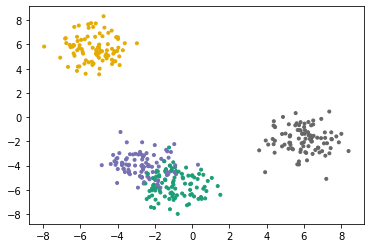

In [ ]:
from sklearn.datasets import make_blobs

# generate blobs with fixed random generator
X, y = make_blobs(n_samples=500, centers=4, random_state=300)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(*X_train.T, c=y_train, marker=".", cmap="Dark2");

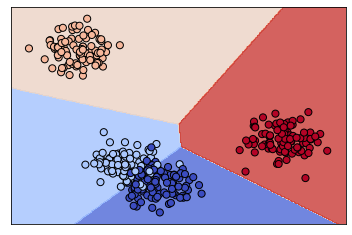

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
plot_classifier(X_train, y_train, lr);

In [ ]:
print("LR classes: ", lr.classes_)
print("Predict proba: ", lr.predict_proba([X_test[0]]))

LR classes:  [0 1 2 3]
Predict proba:  [[5.26494117e-12 7.88844337e-03 9.92111556e-01 1.90406466e-10]]


### So it is possible, but how is it done ... Multi-class strategies

- Two common strategies
    - One-vs-rest (OvR)
    - One-vs-one (OvO)

By default LogisticRegression uses one-vs-rest strategy to deal with multi-class

### One-vs-rest scheme

- Uses "one-vs-rest" scheme (also known as one-vs-all)
  - turns $k$-class classification into $k$ binary classification problems
  - builds $k$ binary classifiers; for each classifier, the class is fitted against all the other classes
  - each one gives a probability of that class assuming it to be "positive" using the sigmoid function
  - normalize these values across all the classes
  - the class with the maximum value is the prediction 
  - you can do this yourself for any binary classifier using the meta-classifier [`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

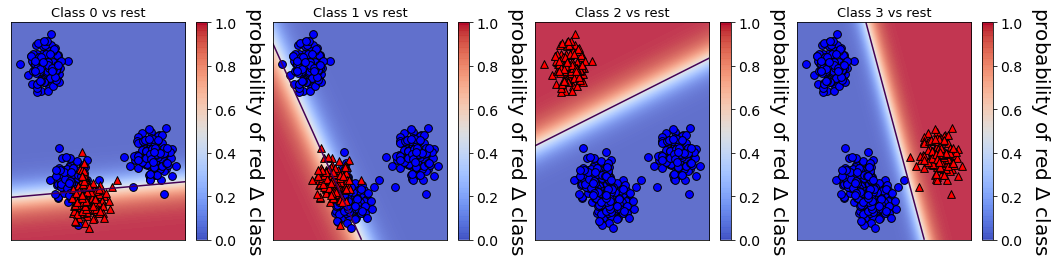

In [ ]:
# Here's how one-vs-rest works:
def one_vs_rest_plots(model_class, X, y):
    plt.figure(figsize=(18, 4))
    classes = np.unique(y)
    k = len(classes)
    for i, c in enumerate(classes):
        plt.subplot(1, k, i + 1)

        y_binary = y == c
        model = model_class()
        model.fit(X, y_binary)
        plot_classifier(X, y_binary, model, ax=plt.gca(), proba=True)
        plt.title("Class %d vs rest" % c, fontsize=13)


one_vs_rest_plots(LogisticRegression, X, y)

## Summary

- Logistic regression is a linear classifier; it has one coefficient per feature, plus an intercept. 
- We combine our features and coefficients with a dot product, that is $w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$.
- The decision boundary is a hyperplane dividing the feature space in half.
- You can think of the coefficients as controlling the orientation/tilt of the hyperplane and the bias representing the intercept (offset from the origin). 